In this blog I am going to explain Regression, it's type, and how can we code a Linear Regression from scratch in Python. First we will look at the concepts and maths behing this algorithm and then we will implement it using `Python`, `NumPy` and `Pandas`.

**By the end of this blog you will bw able to understand:**

1. What is Regression and classification?
2. Difference between Linear Regression and  Non-Linear Regression.
3. Hyothesis(model) of Linear Regression
4. Cost function
5. Gradient Descent
6. How to code all these equation and algorithm in Python?

![](1.png)

#### Regression vs Classification
In Machine Learning, If the output variable has continous range, and we have to find the relationship between the the input and output variable(s). This is called *Regression*. Examples include - House Price, Salary, etc

In contrast, if the the output has descrete range. It is then called *Classification*. Examples include - Cat vs Dog, Spam/Not Spam, etc

These regresssion models can be used for both Inference and Prediction. 

In this blog we are focused to get Prediction using Regression.

#### Regression
Regression in itself can be of multiple types - Linear and Non-Linear Regression.

`Linear Regression` - When the model relates the input(independent) and output(dependent) varibale in straight line. *Simple Linear Regression* is subset of the prior, when there is only single input variable is present. 

`Non-Linear Regression` - When the model relates the input and output varibale in curved line.

I am thowing a lot of jargons here so let me clarify few things before moving forward.

- *Input Variable/Independent Variable/Feature*  are used interchangibly. In ML context these are the values which we are going to have to make the Prediction. For example :- For House Price Prediction we need Size. Size is the Input/Feature.

- *Output Varibale/Dependent Varibale/Target* are those values which we are need to predict. *Price* is the target in case of the last example.

#### Linear Regression 
In this blog we are going to implement *Simple Linear Regression* on a small `dataset`. The information about the dataset is given below.

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We are using a small dataset from [here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html). This a data about Cricket Chirps Vs. Temperature. We will use linear regression to fit model.

In [3]:
# loading data
data = pd.read_excel('slr02.xls', engine='xlrd')

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


Now we look into data we see there are two columns `X` and `Y`, were \
`X = chirps/sec for the striped ground cricket`\
`Y = temperature in degrees Fahrenheit`

In [4]:
# visualise data
data.head()

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


In [5]:
# data we got are in pandas dataframe format
# we need to cast it in numpy array for calulations
X = np.array(data.X)
Y = np.array(data.Y)

In [6]:
# Now we have two arrays. One containing input features and other array has output features
# visualise casted data
print(X,Y)
print("Data points:", len(X))

[20.         16.         19.79999924 18.39999962 17.10000038 15.5
 14.69999981 17.10000038 15.39999962 16.20000076 15.         17.20000076
 16.         17.         14.39999962] [88.59999847 71.59999847 93.30000305 84.30000305 80.59999847 75.19999695
 69.69999695 82.         69.40000153 83.30000305 79.59999847 82.59999847
 80.59999847 83.5        76.30000305]
Data points: 15


In [7]:
# function for plotting data points
def plot_points(X, Y, xlabel, ylabel):
    """Plot points given X and Y co-ordinates and labels them"""
    plt.plot(X, Y, 'o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

This is the scatter-plot visualization of the data we have used. On X-axis we have chirps/sec and on the Y-axis we have Temperature.

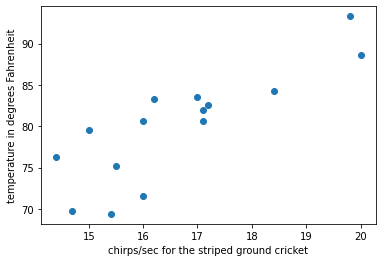

In [8]:
# plot data points
plot_points(X, Y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit")

### Linear Regression hypothesis/model
As mentioned earlier in the definition, *Linear Regression* is a way to find relationship between the input varibale (chirps/sec) and output varibale (temperature) with the help of a straight line.

Our main objective is to fit a straight line though these data points. As we can see the input and output are linearly dependent (as input varibale value increases/decrease, output variable value also tend to increase/decrease).

***Objective*** : *To find a best fit straight line through data points*

Best fit implies that the distance between the points and line should be minimum.

![](2.png)

In the figure, $d_1,d_2,d_3,...., d_n$ represents the distance between the point and the line and our goal is to minimize the sum of these distances. 

**Hypothesis Function:** A stright line can be represented like $h_{\theta}(x)={\theta}_0 + {\theta}_1x$. Where ${\theta}_0$ is the intercept and ${\theta}_1$ is the slope of the line. We have to find this ${\theta}_0$ and ${\theta}_1$ \

Before moving forward, These are some conventions we have taken for varibale names and mathematical equations.

$m$ : number of training examples (m=15, in this case)\
$X$ : input / features\
$Y$ : output/ target\
$x^{(i)}, y^{(i)}$ : $i^{th}$ training example.\
${\theta}_0$ ,${\theta}_1$: Model Parameters / Weights

In [9]:
# initialised random thetas
np.random.seed(2)
theta = np.random.rand(2,1)
# hypothesis of model
def hypothesis(X, theta):
    """Predicts output feature given input feature and theta"""
    return theta[0] + theta[1] * X

Let's plot the initial line to check how ot fits our data.

In [10]:
# plots line of regression
def draw_line(theta, X):
    """Plot a line from slope and intercept"""
    x_vals = X
    y_vals = hypothesis(x_vals, theta)
    plt.plot(x_vals, y_vals, '--')

We want to plot data points and line of regession on same plot to see if we are progressing as we train our model

In [11]:
# plots points and lines
def draw_points_and_lines(X, Y, xlabel, ylabel, theta):
    """Draws lines and points"""
    plot_points(X, Y, xlabel, ylabel)
    draw_line(theta, X)

Now without training our model let's were the line of  regression lies

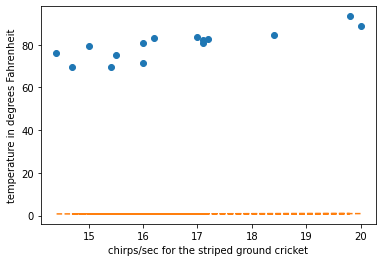

In [12]:
# draw line of regression without traing model
draw_points_and_lines(X, Y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit", theta)

### Cost Function
Cost function givies us measure of how much we are error the hypothesis is making? These *errors* are measured as mean of squared error( $d_1,d_2,d_3,...., d_n$) terms. \

We will be using squared error cost function which is formulated as, \

$d_{i} = h_{\theta}(x^{(i)}) - y^{(i)}$(error) \
errors can be both postive and negetive in direction so, we sqaure this error term to make all the error terms positive(+ve).\
$(d_{i})^2 = (h_{\theta}(x^{(i)}) - y^{(i)})^2$(squared error)\
We need to the line which minimizes the mean of these squared error terms.

Cost function - (*Mean Sqaured Error*) $$J({{\theta}_0, {\theta}_1}) =  \frac{1}{2m}\sum_{i=0}^{i=n-1}(h_{\theta}(x^{(i)}) - y^{(i)})^2$$


*Note:- Mean Squared Error is divided by 2 beacuse it will later help when finding gradient of the function*

We need to minimize this Cost function with respect to ${\theta}_0, {\theta}_1$. After optimization, it will give us the value of parameters(thetas) which in turn will give us the best fit line.

In [17]:
# cost function
m = len(X)
def cost(X, Y, theta):
    """Returns cost"""
    return (1/(2*m)) * np.sum((hypothesis(X, theta) - Y) ** 2)

In [18]:
# initial cost without trraining model
cost(X, Y, theta)

3154.8870744571304

We have now defined a Cost function which tells us how wrong we are from actual label(target). The less the cost - the better. Right now with just random value of theta we have attained a very gigh cost. We need to minimize it. In this blog we are going to use a technique called *Gradient Descent* for minimization of the cost function.

### Gradient Descent
Gradient Descent is the optimization algorithm used to finding the value of paramerter which minimizes the value of *cost function*. In our case we are minimizing MSE Cost function with the help of this algorithm.

This algorithm works by iteratively updating the values of the parameters(thetas) in the direction of the negative gradient of the cost function with respect to the parameters. This means that at each iteration, the parameters are updated in the direction that reduces the value of the cost function.

![Representation of Gradient Descent in 2D Plane(for simlification of understaing). Here Cost is just function for single theta. Steps are taken in the direction opposite to the gradient/slope. Learning rate decides the step size. In this image the gradient is +ve, hence the steps taken will be in negative direction.](3.png)

The *learning rate(denoted by alpha, $\alpha$)* is the one of the hyperparameter(parameter, for which the value needs to decided manually). We need to set learning rate very carefully, It decides the step size in the negative direction of the gradient(slope).\
A higher learning rate can lead to faster convergence, but can also make the algorithm more likely to overshoot the minimum. A lower learning rate can be more stable, but can also lead to slower convergence.

To make a analogy, We can think Gradient descent algorithm like - We are blindfolded and descesnding from a hill(cost function). We will take a step forward evaulate the slope(gradient) and then move according to that. When we will reach bottom of the hill, then the step in any direction will take us upward and thus we know that be have reaced bottom(convergence).

![Gradeint Descent in 3D plane, extension of previous image in both parameter](4.png)

In [58]:
# minimize cost through gradient descent
def gradient_descent(X, Y, theta, alpha, steps):
    for i in range(steps):
        old_cost = cost(X, Y, theta)
        grad0 = ((1/m) * np.sum(hypothesis(X, theta) - Y))
        grad1 = ((1/m) * np.dot((hypothesis(X, theta) - Y), X))
        temp0 = theta[0] - alpha * grad0
        temp1 = theta[1] - alpha * grad1
        theta[0] = temp0
        theta[1] = temp1
        new_cost = cost(X, Y, theta)
        if new_cost > old_cost:
            print("WARNING!!! COST INCREASING")
        else:
            print("Cost Decresing", new_cost)

In [62]:
# train model of 100 iterations
gradient_descent(X, y, theta, alpha=0.0001, steps=100)
theta

Cost Decresing 9.24630550184814
Cost Decresing 9.246299931707105
Cost Decresing 9.246294361576792
Cost Decresing 9.246288791457197
Cost Decresing 9.246283221348309
Cost Decresing 9.246277651250153
Cost Decresing 9.246272081162708
Cost Decresing 9.246266511085983
Cost Decresing 9.246260941019973
Cost Decresing 9.246255370964697
Cost Decresing 9.246249800920113
Cost Decresing 9.246244230886267
Cost Decresing 9.246238660863133
Cost Decresing 9.246233090850716
Cost Decresing 9.246227520849024
Cost Decresing 9.24622195085804
Cost Decresing 9.246216380877774
Cost Decresing 9.246210810908229
Cost Decresing 9.246205240949406
Cost Decresing 9.24619967100129
Cost Decresing 9.246194101063905
Cost Decresing 9.246188531137236
Cost Decresing 9.246182961221276
Cost Decresing 9.246177391316046
Cost Decresing 9.246171821421523
Cost Decresing 9.246166251537723
Cost Decresing 9.246160681664634
Cost Decresing 9.246155111802265
Cost Decresing 9.24614954195063
Cost Decresing 9.246143972109698
Cost Decresing

array([[0.74752333],
       [4.74721199]])

After training we can clearly see we have reduced cost and have found appropriate value of theta

In [63]:
# cost after traing model
cost(X, y, theta)

9.245754109876883

In [64]:
# value of theta after training 
theta

array([[0.74752333],
       [4.74721199]])

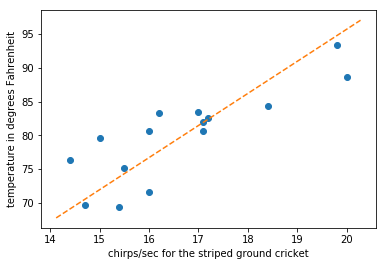

In [65]:
# regression line after traing model
draw_points_and_lines(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit", theta)

We can clearly see we have fitted line to the points. Thus we have successfully used linear regression to train a model.

### Prediction

In [66]:
x = np.array([19])
hypothesis(x, theta)

array([90.94455114])